### Colonnes du dataset et explication :

| **Nom de la colonne** | **Traduction**                   | **Type**                | **Description**                                                                              | **Valeurs possibles (exemples)**                                             |
|-----------------------|----------------------------------|-------------------------|----------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------|
| **age**               | Âge                              | Numérique               | Âge du client                                                                                | ex : 30, 45, 60                                                              |
| **job**               | Profession                       | Catégorielle            | Métier du client                                                                             | `admin.`, `technician`, `services`, `student`, `retired`, `unemployed`, etc. |
| **marital**           | Situation familiale              | Catégorielle            | Statut marital du client                                                                     | `single`, `married`, `divorced`                                              |
| **education**         | Niveau d'études                  | Catégorielle            | Niveau d'éducation du client                                                                 | `primary`, `secondary`, `tertiary`, `unknown`                                |
| **default**           | A-t-il un défaut de crédit ?     | Binaire (texte)         | Le client a-t-il déjà été en défaut de paiement ?                                            | `yes`, `no`                                                                  |
| **balance**           | Solde                            | Numérique               | Solde moyen sur le compte bancaire (en euros)                                                | ex : 100.5, 1200, -45                                                        |
| **housing**           | Prêt immobilier ?                | Binaire (texte)         | Le client a-t-il un prêt logement ?                                                          | `yes`, `no`                                                                  |
| **loan**              | Prêt personnel ?                 | Binaire (texte)         | Le client a-t-il un prêt personnel ?                                                         | `yes`, `no`                                                                  |
| **contact**           | Type de contact                  | Catégorielle            | Moyen de contact utilisé                                                                     | `cellular`, `telephone`, `unknown`                                           |
| **day**               | Jour du contact                  | Numérique               | Jour du mois du dernier contact                                                              | de 1 à 31                                                                    |
| **month**             | Mois du contact                  | Catégorielle            | Mois du dernier contact                                                                      | `jan`, `feb`, ..., `dec`                                                     |
| **duration**          | Durée de l'appel                 | Numérique (secondes)    | Durée du dernier appel avec le client                                                        | ex : 120, 300                                                                |
| **campaign**          | Nombre de contacts               | Numérique               | Nombre de contacts durant la campagne en cours                                               | ex : 1, 2, 5                                                                 |
| **pdays**             | Jours depuis dernier contact     | Numérique               | Jours depuis le dernier contact dans une ancienne campagne (999 = jamais contacté)           | ex : 999, 10, 30                                                             |
| **previous**          | Nb. de contacts précédents       | Numérique               | Nombre de contacts avec le client avant cette campagne                                       | ex : 0, 1, 3                                                                 |
| **poutcome**          | Résultat ancienne campagne       | Catégorielle            | Résultat de la précédente campagne marketing                                                 | `success`, `failure`, `other`, `unknown`                                     |
| **deposit** ou **y**  | A-t-il souscrit ?                | Catégorielle (cible)    | Est-ce que le client a accepté d’ouvrir un dépôt à terme ?                                   | `yes` (a souscrit), `no` (n’a pas souscrit)                                  |


In [2]:
import pandas as pd
import numpy as np


In [3]:
data=pd.read_csv("bank (1).csv")

## charger les donnes

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [6]:
data.shape

(11162, 17)

In [7]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


## data cleaning ##

In [8]:
data=data.drop_duplicates()

In [9]:
### Remplacer les valeurs 'unknown' par NaNµ
data.replace('unknown', pd.NA, inplace=True)

In [10]:
data.isnull().sum() #pour trover les valeurs nulles 

age             0
job            70
marital         0
education     497
default         0
balance         0
housing         0
loan            0
contact      2346
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     8326
deposit         0
dtype: int64

In [11]:
data["poutcome"].describe()

count        2836
unique          3
top       failure
freq         1228
Name: poutcome, dtype: object

In [12]:
# Suppression de la colonne 'poutcome'
data.drop(columns=['poutcome'], inplace=True)

In [13]:
cols_to_fill = ['job', 'education', 'contact'] #remplacement par le mode car ces valeurs sont cattegories
for col in cols_to_fill:
    mode = data[col].mode()[0]
    data[col] = data[col].fillna(mode)



In [14]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
deposit      0
dtype: int64

## Encodage des variables  :

In [15]:


# Identifier les colonnes catégorielles
cat_cols = data.select_dtypes(include='object').columns.tolist()
print("Colonnes catégorielles :", cat_cols)

# Encodage One-Hot Encoding avec drop_first=True pour éviter la multicolinéarité
data_encoded = pd.get_dummies(data, columns=cat_cols, drop_first=True)

# Afficher la nouvelle forme du dataframe
print("Nouvelle forme du DataFrame :", data_encoded.shape)


Colonnes catégorielles : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'deposit']
Nouvelle forme du DataFrame : (11162, 37)


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
##Séparer les features (X) et la target (y)
X = data_encoded.drop('deposit_yes', axis=1)  # On enlève la colonne 'deposit_yes' des features
y = data_encoded['deposit_yes']  # La colonne cible est 'deposit_yes'



#### Division train/test

In [18]:
##Division train/test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##  Standardiser les données

In [19]:
from sklearn.preprocessing import StandardScaler

# Initialiser le scaler
scaler = StandardScaler()

# Appliquer le scaler sur X_train et X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Entrainement de modèle 

In [20]:
from sklearn.linear_model import LogisticRegression

# Initialiser le modèle de régression logistique
model = LogisticRegression(max_iter=1000)

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

## Faire des prédictions

In [21]:
# Prédictions sur les données de test
y_pred = model.predict(X_test_scaled)


## evaluer modele:

Accuracy: 0.79
F1 Score: 0.77

Classification Report:
               precision    recall  f1-score   support

       False       0.78      0.82      0.80      1166
        True       0.79      0.75      0.77      1067

    accuracy                           0.79      2233
   macro avg       0.79      0.78      0.79      2233
weighted avg       0.79      0.79      0.79      2233



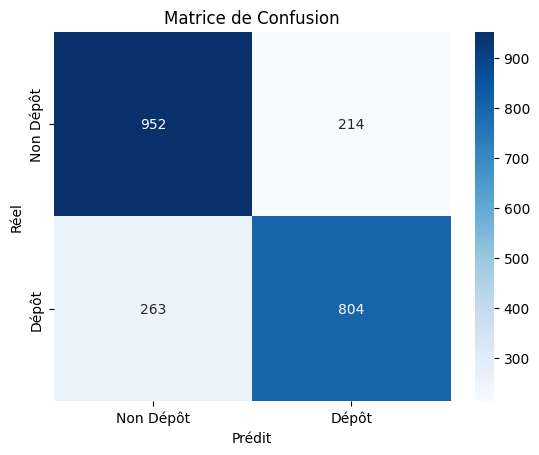

In [ ]:
# Évaluation : Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Évaluation : F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

# Rapport de classification 
print("\nClassification Report:\n", classification_report(y_test, y_pred))



# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non Dépôt', 'Dépôt'], yticklabels=['Non Dépôt', 'Dépôt'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

## courbr ROC



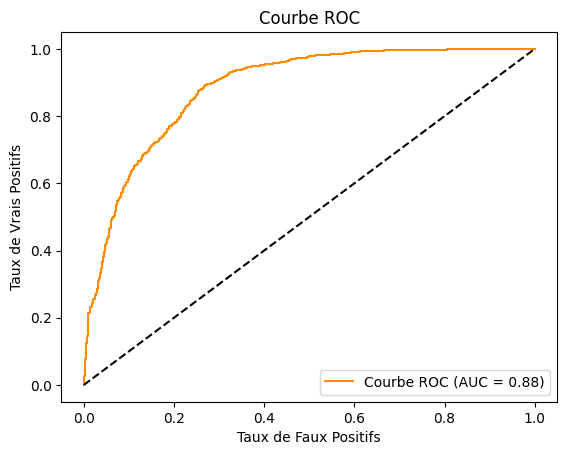

In [23]:
# Courbe ROC et AUC
y_prob = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'Courbe ROC (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()




## knn

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns



In [25]:
# 1. Séparation des features et de la cible
X = data_encoded.drop(columns=['deposit_yes'])  
y = data_encoded['deposit_yes']  # la cible binaire (0 ou 1)



In [26]:
# 2. Division en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

# 3.  entraînement du modèle KNN
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, y_train)



KNeighborsClassifier()

In [28]:
# 4. Prédictions
y_pred = knn.predict(X_test)



In [29]:
# 5. Évaluation
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(classification_report(y_test, y_pred))



Accuracy: 0.75
F1 Score: 0.73
              precision    recall  f1-score   support

       False       0.75      0.77      0.76      1166
        True       0.74      0.72      0.73      1067

    accuracy                           0.75      2233
   macro avg       0.75      0.75      0.75      2233
weighted avg       0.75      0.75      0.75      2233



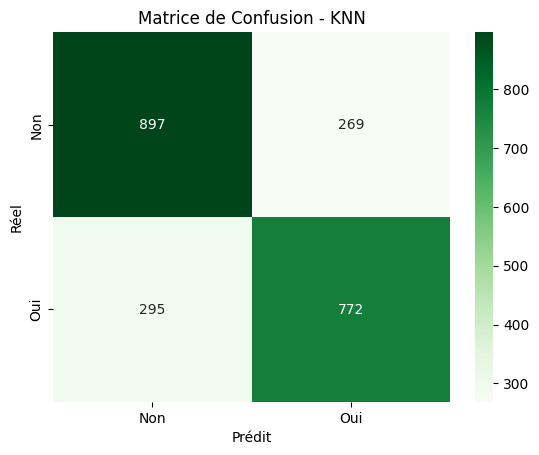

In [30]:
# 6. Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Non', 'Oui'], yticklabels=['Non', 'Oui'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion - KNN')
plt.show()



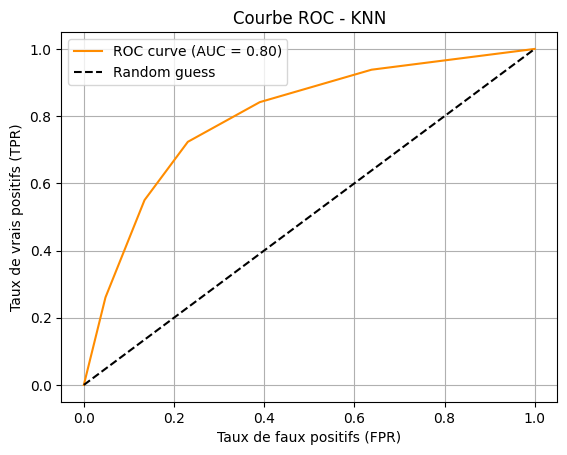

In [31]:
# 7. ROC Curve
y_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC - KNN')
plt.legend()
plt.grid(True)
plt.show()


## Random Forest:

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns



In [33]:
# 1. Séparer les features et la cible
X = data_encoded.drop(columns=['deposit_yes'])  # Features
y = data_encoded['deposit_yes']  # Target (0 ou 1)



In [34]:
# 2. Diviser en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# 3. modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [36]:
# 4. Prédictions
y_pred = rf_model.predict(X_test)



In [37]:
# 5. Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(classification_report(y_test, y_pred))



Accuracy: 0.84
F1 Score: 0.83
              precision    recall  f1-score   support

       False       0.87      0.81      0.84      1166
        True       0.81      0.86      0.83      1067

    accuracy                           0.84      2233
   macro avg       0.84      0.84      0.84      2233
weighted avg       0.84      0.84      0.84      2233



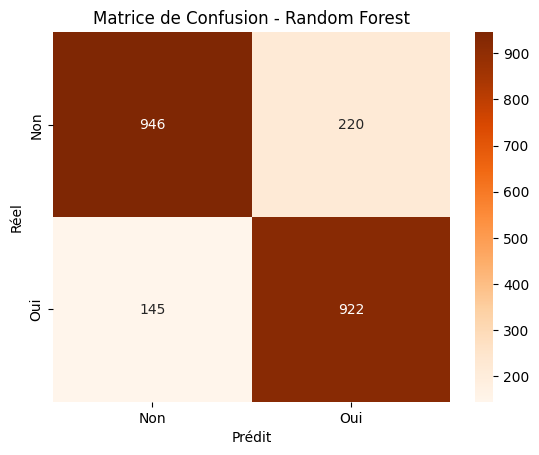

In [38]:
# 6. Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Non', 'Oui'], yticklabels=['Non', 'Oui'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion - Random Forest')
plt.show()




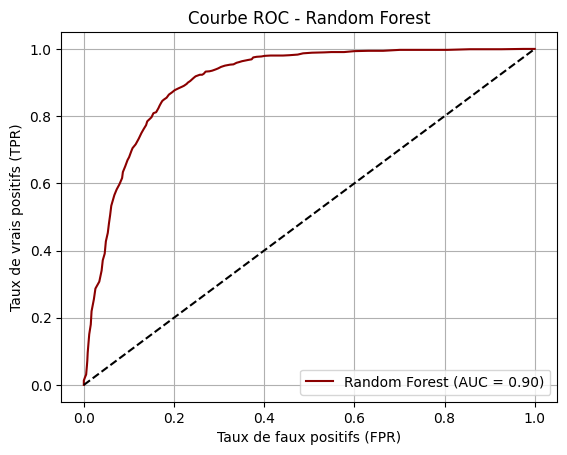

In [39]:
# 7. Courbe ROC
y_proba = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})', color='darkred')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC - Random Forest')
plt.legend()
plt.grid(True)
plt.show()

## SVM

In [40]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns



In [41]:
# 1. Séparer les features et la target
X = data_encoded.drop(columns=['deposit_yes'])  # Variables explicatives
y = data_encoded['deposit_yes']  # Variable cible (0 ou 1)



In [42]:
# 2. Division train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [43]:
X.shape

(11162, 36)

In [44]:
# 3. Initialisation du modèle SVM avec probabilité activée
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

# SVM rapide
base_model = LinearSVC(random_state=42, max_iter=10000)
svm_model = CalibratedClassifierCV(base_model, cv=5)

# Entraînement
svm_model.fit(X_train, y_train)




CalibratedClassifierCV(cv=5,
                       estimator=LinearSVC(max_iter=10000, random_state=42))

In [45]:
# 4. Prédiction
y_pred = svm_model.predict(X_test)



Accuracy: 0.79
F1 Score: 0.77
              precision    recall  f1-score   support

       False       0.78      0.82      0.80      1166
        True       0.79      0.75      0.77      1067

    accuracy                           0.79      2233
   macro avg       0.79      0.78      0.78      2233
weighted avg       0.79      0.79      0.79      2233



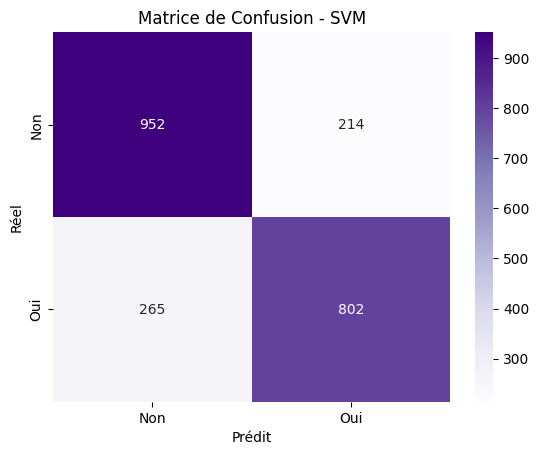

In [46]:
# 5. Évaluation
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(classification_report(y_test, y_pred))


# 6. Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Non', 'Oui'], yticklabels=['Non', 'Oui'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion - SVM')
plt.show()

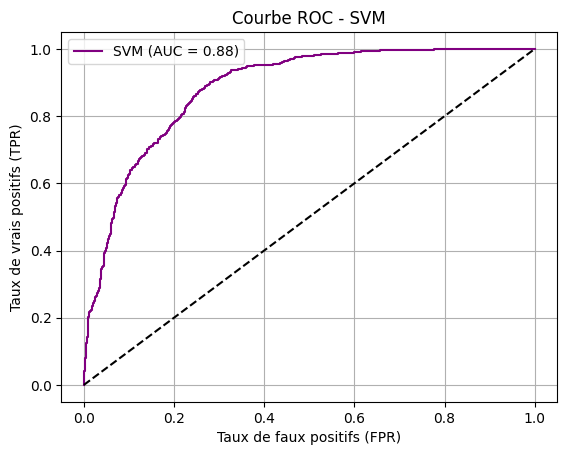

In [47]:

# 7. Courbe ROC
y_proba = svm_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'SVM (AUC = {roc_auc:.2f})', color='purple')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC - SVM')
plt.legend()
plt.grid(True)
plt.show()

## lien de application :

 Local URL: http://localhost:8501
  Network URL: http://192.168.25.31:8501